In [20]:
using Catlab
using Catlab.CategoricalAlgebra
using Catlab.WiringDiagrams
using Catlab.Programs

using AlgebraicDynamics
using AlgebraicDynamics.DWDDynam
using AlgebraicDynamics.CPortGraphDynam
using AlgebraicDynamics.CPortGraphDynam: draw, barbell, gridpath, grid, meshpath

using LabelledArrays

using DynamicalSystems
using Plots

# Logistic Map

In [2]:

# Define the composition pattern
n = 100
row = apex(gridpath(n, 1))

# Define the primitive system which will be repeated for each cell
f(x, p) = 1 - p.a*x^2
L(u,x,p,t) = (1-p.ϵ)*f(u[1], p) + 0.5*p.ϵ*(f(x[1], p) + f(x[2], p))

cell = DiscreteMachine{Float64}(2, 1, 2, L, u->[u[1], u[1]])

# Compose
CML = oapply(row, cell)


DiscreteMachine(ℝ^100 × ℝ^2 → ℝ^100)

In [3]:
params = LVector(ϵ = 0.00115, a = 1.7522)
N = 10000
u0 = rand(Float64, n)

traj = trajectory(CML, u0, [0,0], params, N)
xs = Matrix(traj)

true

true

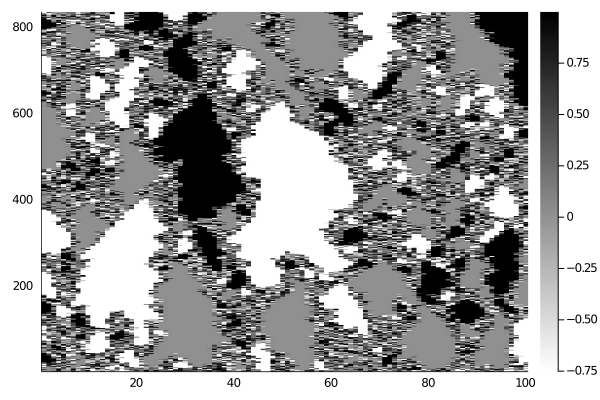

In [4]:
period = 12
ys = xs[1:period:end, :]

Plots.heatmap(ys, yflip=false, color=:binary)

# Coupled map lattice for convection

In [5]:
# Discrete laplacian operator
ΔA(x, n, w, s, e) = 0.25 * (A(n), A(w), A(s), A(e)  - 4*A(x))

# Buoyancy procedure
vy_star(x, n, w, s, e) = vy(x) + 0.5*c8(2*E(x) - E(w) - E(e))
vx_star(x) = vx(x)

# Heat diffusion
E′(x) = E(x) + κΔE(x)

# visosity and pressure effet
v′(x) = vx_star(x))

# Define the composition pattern


# Define the primitive system which will be repeated for each cell
f(x, p) = 1 - p.a*x^2
L(u, x, p, t) = (1-p.ϵ)*f(u[1], p) + 0.5*p.ϵ*(f(x[1], p) + f(x[2], p))

cell = DiscreteMachine{Float64}(2, 1, 2, L, u->[u[1], u[1]])

# Compose
CML = oapply(row, cell)

LoadError: syntax: extra token ")" after end of expression

# SIR

`u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]`

Port,box
1,1
2,1
3,1
4,2
5,2
6,2
7,2
8,3
9,3
10,3
